In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Add src to path so we can import our modules
sys.path.append(os.path.abspath(os.path.join('..')))

from src.loader import load_news_data, load_stock_data
from src.eda import plot_headline_length, plot_article_count_per_publisher, analyze_publication_dates
from src.technical_analysis import apply_technical_indicators
from src.sentiment import analyze_sentiment
from src.correlation import calculate_daily_returns, align_and_correlate

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Load News Data
# Check your data/raw folder name. It might be 'raw_analyst_ratings.csv'
news_path = '../data/raw/raw_analyst_ratings.csv' 
news_df = load_news_data(news_path)

print(f"News loaded: {len(news_df)} rows")
print(news_df.head(2))

# Load Stock Data
# Check if yfinance_data.zip created a 'Data' subfolder
stock_folder = '../data/raw/Data/' 
# If stocks are directly in raw, use '../data/raw/'
if not os.path.exists(stock_folder):
    stock_folder = '../data/raw/'

stocks = load_stock_data(stock_folder)
print(f"Stocks loaded: {list(stocks.keys())}")

Loaded news data with shape: (1407328, 6)
News loaded: 1407328 rows
   Unnamed: 0                                    headline  \
0           0     Stocks That Hit 52-Week Highs On Friday   
1           1  Stocks That Hit 52-Week Highs On Wednesday   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   

                       date stock  
0 2020-06-05 10:30:54-04:00     A  
1 2020-06-03 10:45:20-04:00     A  
Loaded MSFT data with shape: (3774, 5)
Loaded NVDA data with shape: (3774, 5)
Loaded AMZN data with shape: (3774, 5)
Loaded AAPL data with shape: (3774, 5)
Loaded GOOG data with shape: (3774, 5)
Loaded META data with shape: (2923, 5)
Loaded raw_analyst_ratings data with shape: (1407328, 6)
Stocks loaded: ['MSFT', 'NVDA', 'AMZN', 'AAPL', 'GOOG', 'META', 'raw_analyst_ratings']


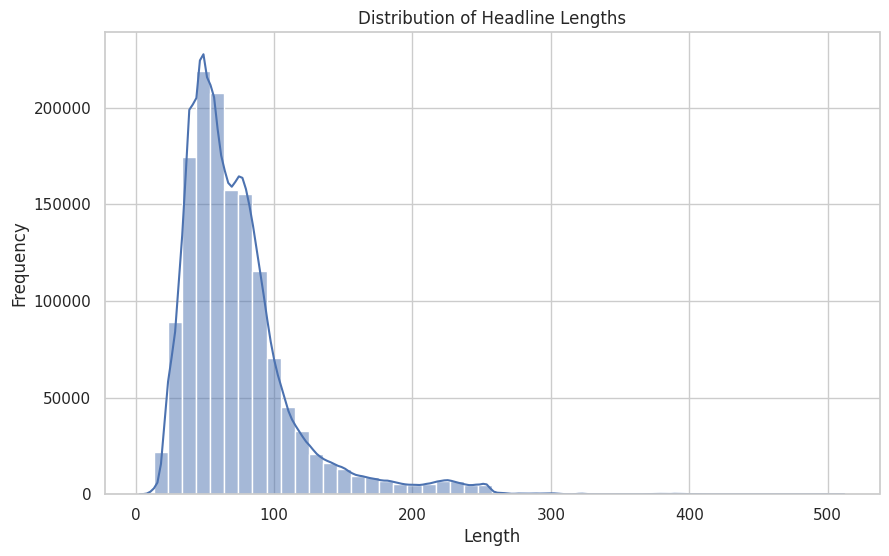

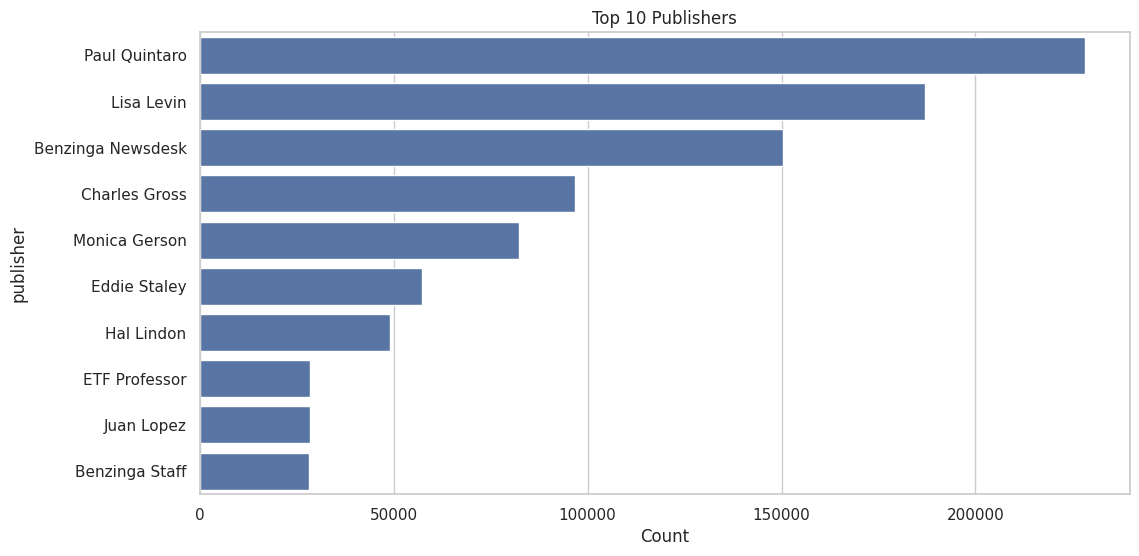

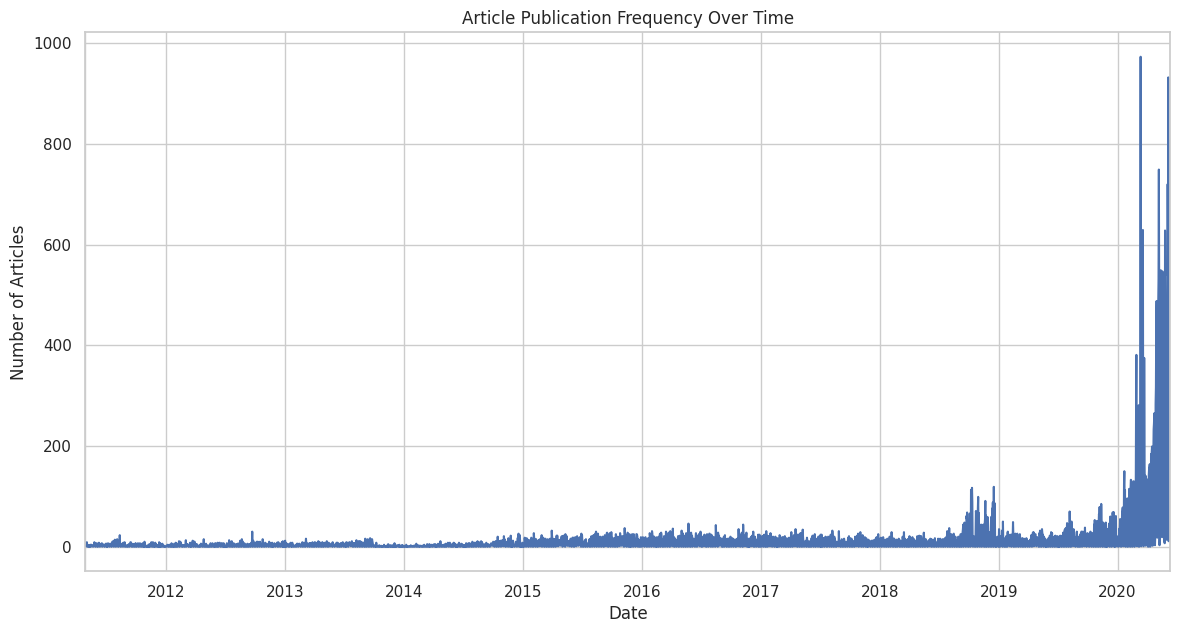

In [3]:
# 1. Headline Length Distribution
plot_headline_length(news_df)

# 2. Top Publishers
plot_article_count_per_publisher(news_df)

# 3. Publication Dates Trend
analyze_publication_dates(news_df)

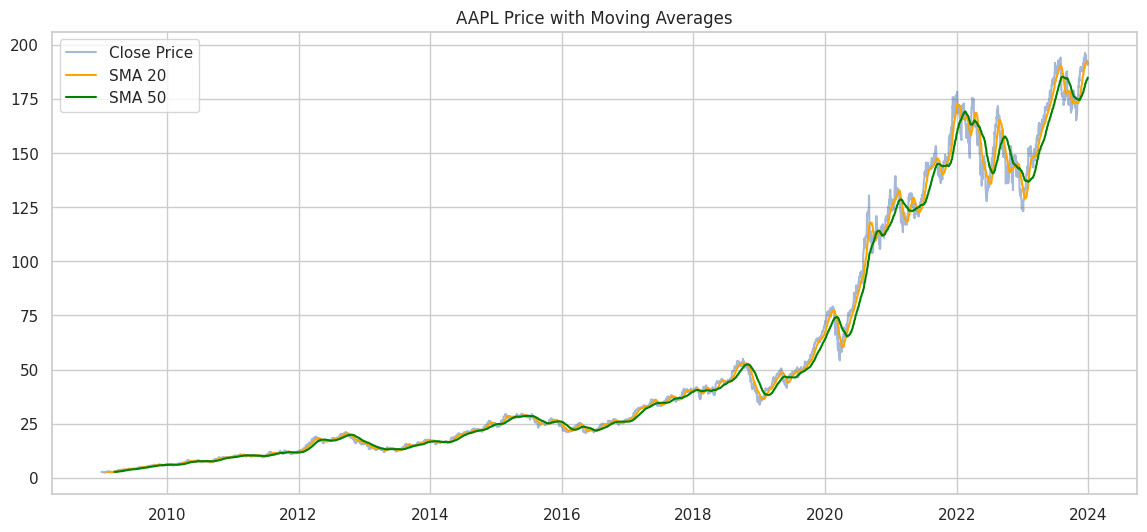

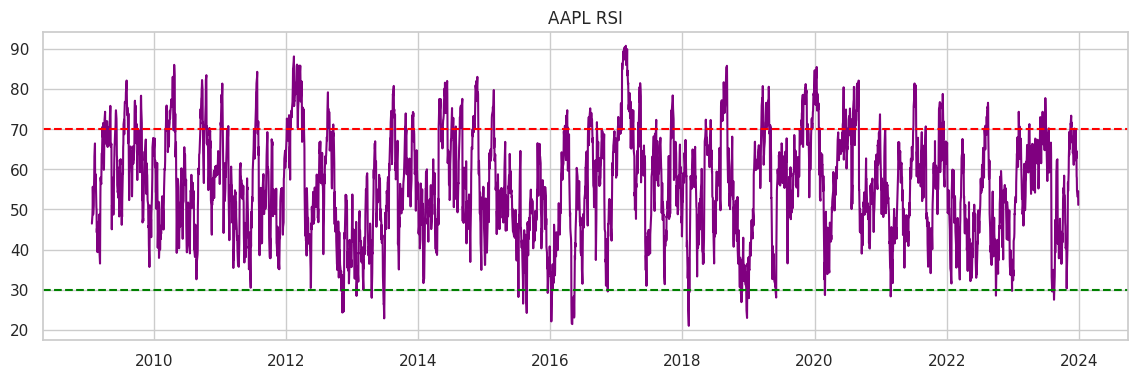

In [4]:
# Let's analyze Apple (AAPL) as a primary example
ticker = 'AAPL'
if ticker in stocks:
    df = stocks[ticker]
    
    # Apply Indicators
    df = apply_technical_indicators(df)
    
    # Plot Price vs SMA
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
    plt.plot(df.index, df['SMA_20'], label='SMA 20', color='orange')
    plt.plot(df.index, df['SMA_50'], label='SMA 50', color='green')
    plt.title(f'{ticker} Price with Moving Averages')
    plt.legend()
    plt.show()
    
    # Plot RSI
    plt.figure(figsize=(14, 4))
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red')
    plt.axhline(30, linestyle='--', color='green')
    plt.title(f'{ticker} RSI')
    plt.show()

In [5]:
# --- Use a sample to speed up processing ---
# 1.4 million rows will take too long. We use 10,000 random rows for the report.
news_df_sample = news_df.sample(n=10000, random_state=42) 

print("Running sentiment analysis on sample...")
news_df_scored = analyze_sentiment(news_df_sample) # <--- USE THE SAMPLE HERE

# Calculate Correlations for AAPL
if ticker in stocks:
    stock_df = stocks[ticker]
    stock_df = calculate_daily_returns(stock_df)
    
    # Align dates and calculate correlation
    merged, pearson, spearman = align_and_correlate(news_df_scored, stock_df, ticker)
    
    print(f"--- {ticker} Correlation Results ---")
    print(f"Pearson Correlation: {pearson:.4f}")
    print(f"Spearman Correlation: {spearman:.4f}")
    
    # Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=merged['sentiment'], y=merged['return'])
    plt.title(f'Daily Sentiment vs Stock Returns ({ticker})')
    plt.xlabel('Average Daily Sentiment')
    plt.ylabel('Daily Stock Return')
    plt.show()

Running sentiment analysis on sample...
Running sentiment analysis...
Not enough overlapping data for AAPL
--- AAPL Correlation Results ---
Pearson Correlation: 0.0000
Spearman Correlation: 0.0000


KeyError: 'sentiment'

<Figure size 1000x600 with 0 Axes>